In [46]:
import lic
import numpy as np
import pyvista as pv
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [47]:
# input = '../Data/fourcenters2d.vti'
# output = '../../Paraview/fourcenters/fourcenters'
input = '../Data/beads2d.vti'
output = '../../Paraview/beads/beads'
mesh = pv.read(input)
print(mesh)

UniformGrid (0x2ac50ed1ca0)
  N Cells:	8241919
  N Points:	8388608
  X Bounds:	-2.000e+00, 2.000e+00
  Y Bounds:	-2.000e+00, 2.000e+00
  Z Bounds:	0.000e+00, 6.283e+00
  Dimensions:	128, 128, 512
  Spacing:	3.150e-02, 3.150e-02, 1.230e-02
  N Arrays:	2



In [48]:
x = mesh.x.copy()
y = mesh.y.copy()
z = mesh.z.copy()

xn = np.reshape(x, mesh.dimensions, order='F')
yn = np.reshape(y, mesh.dimensions, order='F')
zn = np.reshape(z, mesh.dimensions, order='F')

In [49]:
u = mesh.point_data['u']
v = mesh.point_data['v']

un = np.reshape(u, mesh.dimensions, order='F')
vn = np.reshape(v, mesh.dimensions, order='F')

In [50]:
def updateAnimation(frame):
    print(frame)
    lic_result = lic.lic(un[:,:,frame], vn[:,:,frame], length=30)
    return lic_result

generate lics: 100%|██████████| 15/15 [00:00<00:00, 76.92it/s]


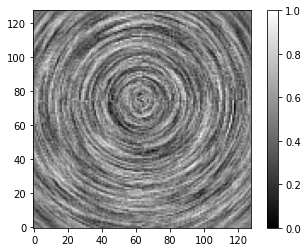

In [57]:
fig = plt.figure()
lic_result = lic.lic(un[:,:,0], vn[:,:,0], length=30)

plt.imshow(lic_result, origin='lower', cmap='gray', clim=[0,1])
plt.colorbar()

In [58]:
anim = FuncAnimation(fig, updateAnimation, frames=zn.shape[2], interval=10)

In [60]:
anim.save('./Images/Images/lic.gif', fps=60)

0


generate lics: 100%|██████████| 15/15 [00:00<00:00, 60.94it/s]


0


generate lics: 100%|██████████| 15/15 [00:00<00:00, 61.48it/s]


1


generate lics: 100%|██████████| 15/15 [00:00<00:00, 63.03it/s]
lic | 2022-03-13 21:45:45,839 | WARNING  | MovieWriter stderr:
./Images/Images/lic.gif: No such file or directory



CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '432x288', '-pix_fmt', 'rgba', '-r', '60', '-loglevel', 'error', '-i', 'pipe:', '-filter_complex', 'split [a][b];[a] palettegen [p];[b][p] paletteuse', '-y', './Images/Images/lic.gif']' returned non-zero exit status 1.